# Statistical Analysis in Major League Baseball: Is Salary Really Commensurate with Skill?

## Introduction

Baseball is known as America's favourite past time, millions of people tune in to watch and cheer for their favourite team. This sport has grown so large there are statistics for almost everything in the game. One of the more well known aspects is batting, and generally speaking, the more you can hit the more you will be paid.

In this analysis we will be using the Pearson r hypothesis test to determine whether or not a players salary is commensurate with skill. Our null hypothesis states there would be no correlation between skill and salary, making them not commensurate with one another. If we look at the alternative hypothesis, it states that there is a correlation between salary and skill, making them commensurate with one another. We will set the threshold for the Pearson r hypothesis test's r-value close to 1 or -1 and a p-value less than 0.05. Over the course of this analysis we will look at the following statistics:

- Strike-outs per At Bats
- Home-runs peer At Bats
- Hits per At Bats
- Walk to Strike-out Ratio

Each of these statistics will be explained in more detail as the analysis progresses.

### Summary of Results

We have determined with a high degree of confidence that the alternative hypothesis is correct, meaning as salary interval increases, so do the statistics of each individual. Using this type of statistical hypothesis testing we cannot be fully sure that this the case. Given that the p-values are incredibly small the probably that we are randomly seeing this type of correlation is also incredibly small, but not zero. This allows us to have a very high confidence in result we are seeing. 

Please refer to the full analysis below for a more in-depth exploration of Major League Baseball batting statistics.


## Data Exploration

The baseball database we will be working with was created by Sean Lahman and can be found on his website [here](http://www.seanlahman.com/baseball-archive/statistics/), the database itself can be downloaded directly from [here](https://s3.amazonaws.com/dq-content/224/lahman2015.sqlite). For further documentation, you can read about it in more detail [here](http://seanlahman.com/files/database/readme2016.txt).

Before the database can be used we need to explore it first so we know what data it contains. 

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('lahman2015.sqlite')

pd.set_option('display.max_columns', 30)

def pd_query(query):
    return pd.read_sql_query(query, conn)

# All table names within the database
query = "Select Name As 'Table Names' From sqlite_master Where Type='table';"
pd_query(query)


,Table Names
0,AllstarFull
1,Appearances
2,AwardsManagers
3,AwardsPlayers
4,AwardsShareManagers
5,AwardsSharePlayers
6,Batting
7,BattingPost
8,CollegePlaying
9,Fielding


The tables that are most important to our analysis are Batting, Salaries, and Master. Each of these will now be explored in slightly more detail below.

In [2]:
# Read the table name and types we are collecting.

pd_query('PRAGMA table_info(Batting)')

,cid,name,type,notnull,dflt_value,pk
0,0,playerID,TEXT,0,None,0
1,1,yearID,INTEGER,0,None,0
2,2,stint,INTEGER,0,None,0
3,3,teamID,TEXT,0,None,0
4,4,lgID,TEXT,0,None,0
5,5,G,INTEGER,0,None,0
6,6,G_batting,INTEGER,0,None,0
7,7,AB,INTEGER,0,None,0
8,8,R,INTEGER,0,None,0
9,9,H,INTEGER,0,None,0


In [3]:
# Read the column names from the Batting table
query = "Select * From Batting Limit 5"

pd_query(query)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
1,aardsda01,2006,1,CHN,NL,45,None,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,None
2,aardsda01,2007,1,CHA,AL,25,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None
3,aardsda01,2008,1,BOS,AL,47,None,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,None
4,aardsda01,2009,1,SEA,AL,73,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None


In [4]:
# Read the table name and types we are collecting.

pd_query('PRAGMA table_info(Salaries)')

,cid,name,type,notnull,dflt_value,pk
0,0,yearID,INTEGER,0,None,0
1,1,teamID,TEXT,0,None,0
2,2,lgID,TEXT,0,None,0
3,3,playerID,TEXT,0,None,0
4,4,salary,REAL,0,None,0


In [5]:
# Read the column names from the Salaries table
query = "Select * From Salaries Limit 5"
pd_query(query)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000.0
1,1985,ATL,NL,bedrost01,550000.0
2,1985,ATL,NL,benedbr01,545000.0
3,1985,ATL,NL,campri01,633333.0
4,1985,ATL,NL,ceronri01,625000.0


In [6]:
# Read the table name and types we are collecting.

pd_query('PRAGMA table_info(Master)')

,cid,name,type,notnull,dflt_value,pk
0,0,playerID,TEXT,0,None,0
1,1,birthYear,INTEGER,0,None,0
2,2,birthMonth,INTEGER,0,None,0
3,3,birthDay,INTEGER,0,None,0
4,4,birthCountry,TEXT,0,None,0
5,5,birthState,TEXT,0,None,0
6,6,birthCity,TEXT,0,None,0
7,7,deathYear,INTEGER,0,None,0
8,8,deathMonth,INTEGER,0,None,0
9,9,deathDay,INTEGER,0,None,0


In [7]:
# Read the column names from the Master table
query = "Select * From Master Limit 5"
pd_query(query)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,None,None,None,David,Aardsma,David Allan,220,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934,2,5,USA,AL,Mobile,NaN,NaN,NaN,None,None,None,Hank,Aaron,Henry Louis,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939,8,5,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954,9,8,USA,CA,Orange,NaN,NaN,NaN,None,None,None,Don,Aase,Donald William,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972,8,25,USA,FL,Palm Beach,NaN,NaN,NaN,None,None,None,Andy,Abad,Fausto Andres,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01


From exploring the database and tables above we see that we have all the information we need to conduct our analysis. 

It is also worth noting that the data actually goes back to the year 1871. For our purposes, as we don't want to deal with changes in salary and inflation over this large period of time our analysis will be better represented by only looking at data from the year 2000 and onward.

## Data Gathering

We can now gather the batters name, year, salary, at bats, hits, home-runs, strike-outs, and walks by joining these three tables together. Once we have gathered this data we can create a dataframe using the results to analyze further using the pandas toolkit.

In [8]:
# Gather the data we need for the analysis
query = '''Select Master.nameGiven As 'Player Name', Batting.yearID As 'Year', Salaries.salary As 'Salary', 
Batting.H, Batting.HR, Batting.AB, Batting.SO, Batting.BB
From Batting 
    Inner Join Salaries 
        on Batting.playerID == Salaries.playerID And batting.yearID == Salaries.yearID
    Inner Join Master
        on Batting.playerID == Master.playerID
Where Batting.yearID > 2000
;'''

baseball_data = pd_query(query)
baseball_data.head(10)


,Player Name,Year,Salary,H,HR,AB,SO,BB
0,Garret Joseph,2001,4500000.0,194,28,672,100,27
1,Kimera Anotchi,2001,270000.0,0,0,15,5,2
2,David Mark,2001,200000.0,166,4,582,60,43
3,Darin Charles,2001,3450000.0,163,9,631,113,62
4,Jorge,2001,500000.0,33,2,148,15,3
5,Romar Benjamin,2001,350000.0,77,8,260,57,14
6,Troy Edward,2001,1250000.0,147,41,588,158,107
7,Shigetoshi,2001,1500000.0,0,0,0,0,0
8,Glenallen,2001,1500000.0,9,1,66,20,0
9,Michael James,2001,705000.0,0,0,0,0,0


## Data Cleaning

In this section, we will be filtering the data and then creating the statistical data we will be using for the analysis portion of this project.

### Filtering Data

First we will have to set up some filters as we can see that some individuals didn't have any stats for that year. There could be multiple reasons for this, but ultimately they never played any games in Major League Baseball and we need to disregard them.

As a filter, let's find the mean value and once we have this we can use this as the filter limit. Anything over the mean will be included in the analysis and anything under won't be included.

In [9]:
# Print filter threshold
print('Average At Bats (AB): ', baseball_data.mean(axis=0)[4])

Average At Bats (AB):  165.217781098


In the above calculation, we can see that the limit for the AB will be 165.

In [10]:
# Find filter mean
baseball_data_filtered = baseball_data[baseball_data['AB'] >= 165]

baseball_col_names = ['Name', 'Year', 'Salary', 'H','HR','AB','SO','BB']
baseball_data_filtered.columns = baseball_col_names
baseball_data_filtered.head(10)

,Name,Year,Salary,H,HR,AB,SO,BB
0,Garret Joseph,2001,4500000.0,194,28,672,100,27
2,David Mark,2001,200000.0,166,4,582,60,43
3,Darin Charles,2001,3450000.0,163,9,631,113,62
5,Romar Benjamin,2001,350000.0,77,8,260,57,14
6,Troy Edward,2001,1250000.0,147,41,588,158,107
11,Adam Thomas,2001,280000.0,129,6,478,71,27
13,Benjamin Jose,2001,350000.0,85,6,325,51,16
16,Orlando,2001,900000.0,56,2,230,24,25
20,Timothy James,2001,6500000.0,108,17,475,121,96
22,Scott Edward,2001,1125000.0,124,13,457,65,34


This new filtered dataframe contains only the filtered values we are looking for.

### Determining Statistics

Here we will be transforming the data to reflect the statistics we actually want to compare at each interval.

In [11]:
# Find repeating year example
name = baseball_data_filtered[baseball_data_filtered['Name'] == 'Garret Joseph']
name.head(10)

,Name,Year,Salary,H,HR,AB,SO,BB
0,Garret Joseph,2001,4500000.0,194,28,672,100,27
915,Garret Joseph,2002,5000000.0,195,29,638,80,30
1804,Garret Joseph,2003,5350000.0,201,29,638,83,31
2700,Garret Joseph,2004,6200000.0,133,14,442,75,29
3964,Garret Joseph,2005,9600000.0,163,17,575,84,23
4851,Garret Joseph,2006,10600000.0,152,17,543,95,38
5764,Garret Joseph,2007,11600000.0,124,16,417,54,27
6649,Garret Joseph,2008,12600000.0,163,15,557,77,29
7186,Garret Joseph,2009,2500000.0,133,13,496,73,27


Here we can see some names will have more than one year and data attached to them. If we use the 'groupby' function we can sum each of these columns together, then remove the year column as it is no longer necessary. To make our lives easier we can also create the actual statistics we would like to compare as well.

In [12]:
# Use the group by function for the name column, reducing multi year rows to just 1, then drop the year column
grouped_baseball_data = baseball_data_filtered.groupby(by=['Name']).mean().drop('Year', axis = 1).sort_values(by=['Salary'],ascending=True)


# Create the stats we need to compare
grouped_baseball_data['SO/AB (%)'] = (grouped_baseball_data['SO']/grouped_baseball_data['AB'])*100
grouped_baseball_data['HR/AB (%)'] = (grouped_baseball_data['HR']/grouped_baseball_data['AB'])*100
grouped_baseball_data['H/AB (%)'] = (grouped_baseball_data['H']/grouped_baseball_data['AB'])*100
grouped_baseball_data['BB/SO (%)'] = (grouped_baseball_data['BB']/grouped_baseball_data['SO'])*100

grouped_baseball_data.head(10)



,Salary,H,HR,AB,SO,BB,SO/AB (%),HR/AB (%),H/AB (%),BB/SO (%)
Name,,,,,,,,,,
Damon Reed,203000.0,41.0,10.0,173.0,34.0,24.0,19.653179,5.780347,23.699422,70.588235
Dermal Bram,205000.0,93.0,7.0,380.0,81.0,22.0,21.315789,1.842105,24.473684,27.160494
Stanley Jason,205000.0,57.0,3.0,222.0,55.0,18.0,24.774775,1.351351,25.675676,32.727273
Fernando Jose,205000.0,41.0,0.0,167.0,32.0,7.0,19.161677,0.000000,24.550898,21.875000
George Paul,210000.0,58.0,5.0,241.0,78.0,20.0,32.365145,2.074689,24.066390,25.641026
Michael Curtis,215000.0,80.0,2.0,289.0,72.0,39.0,24.913495,0.692042,27.681661,54.166667
Jose Daniel,216500.0,50.0,7.0,198.0,33.0,15.0,16.666667,3.535354,25.252525,45.454545
Calvin Duane,222500.0,80.0,6.0,326.0,57.0,32.0,17.484663,1.840491,24.539877,56.140351
Chad Bruce,223000.0,40.0,7.0,194.0,68.0,17.0,35.051546,3.608247,20.618557,25.000000


As we are looking to determine whether salary is commensurate with skill we wanted to look at a few important statistics. The above print out is a small portion of the data we will be examining, but it outlines the stats will will want to examine. For further clarification, here are the definitions for each statistic we will be using:

**SO/AB** - Strike-outs per At Bats is a normalization of data providing us with a percentage of times the batter has been struck out compared the number of times they have stepped up to the plate. The smaller this value the better.

**HR/AB** - Home-runs per At Bats is a normalization of data providing us with the percentage of the batter has hit a home run compared to the number times they have stepped up to the plate. The larger this value the better.

**H/AB** - Hits per At Bats is a normalization of data providing us with the percentage of times the batter has a hit compared to the number of times they have stepped up to the plate. The larger this value the better.

**BB/SO** - Walks per Strike-outs is a normalization of data providing us with a percentage of the amount of time a batter ends up walking compared to the amount of strike-outs they have. The larger this value the better.


## Data Analysis

Now that we have filtered our data and determined the correct statistics to use, we can start to analyze the data. First we will take a high level look at the data and then dive in a bit deeper to fully determine the answer to our question.

### High Level Analysis

Using the above information, let's determine the low, medium, and high salaried groupings we want in order to get a better understanding of our hypothesis.

In [13]:
# Lowest salaried players
lowest_salaried = grouped_baseball_data.head(20)
grouped_baseball_data.head(20)


,Salary,H,HR,AB,SO,BB,SO/AB (%),HR/AB (%),H/AB (%),BB/SO (%)
Name,,,,,,,,,,
Damon Reed,203000.0,41.0,10.0,173.0,34.0,24.0,19.653179,5.780347,23.699422,70.588235
Dermal Bram,205000.0,93.0,7.0,380.0,81.0,22.0,21.315789,1.842105,24.473684,27.160494
Stanley Jason,205000.0,57.0,3.0,222.0,55.0,18.0,24.774775,1.351351,25.675676,32.727273
Fernando Jose,205000.0,41.0,0.0,167.0,32.0,7.0,19.161677,0.000000,24.550898,21.875000
George Paul,210000.0,58.0,5.0,241.0,78.0,20.0,32.365145,2.074689,24.066390,25.641026
Michael Curtis,215000.0,80.0,2.0,289.0,72.0,39.0,24.913495,0.692042,27.681661,54.166667
Jose Daniel,216500.0,50.0,7.0,198.0,33.0,15.0,16.666667,3.535354,25.252525,45.454545
Calvin Duane,222500.0,80.0,6.0,326.0,57.0,32.0,17.484663,1.840491,24.539877,56.140351
Chad Bruce,223000.0,40.0,7.0,194.0,68.0,17.0,35.051546,3.608247,20.618557,25.000000


In [14]:
# Medium salaried players
midpoint = int(grouped_baseball_data.shape[0]/2)
medium_salaried = grouped_baseball_data.iloc[midpoint-10:midpoint+10]
grouped_baseball_data.iloc[midpoint-10:midpoint+10]

,Salary,H,HR,AB,SO,BB,SO/AB (%),HR/AB (%),H/AB (%),BB/SO (%)
Name,,,,,,,,,,
Russell Stuart,1.300000e+06,43.000000,7.000000,167.000000,49.000000,17.000000,29.341317,4.191617,25.748503,34.693878
Jeffrey Adam,1.303000e+06,99.400000,6.000000,402.400000,64.400000,22.600000,16.003976,1.491054,24.701789,35.093168
Michael Charles,1.306850e+06,122.875000,10.125000,425.500000,57.375000,39.000000,13.484136,2.379553,28.877791,67.973856
Jose Nicolas,1.315333e+06,76.500000,3.250000,287.250000,47.500000,24.750000,16.536118,1.131419,26.631854,52.105263
Rey Francisco,1.320000e+06,75.200000,0.600000,275.200000,26.400000,11.200000,9.593023,0.218023,27.325581,42.424242
Jose Alexander,1.320625e+06,74.875000,3.500000,303.375000,36.500000,22.625000,12.031314,1.153688,24.680676,61.986301
Matthew Edward,1.327500e+06,89.200000,7.800000,293.200000,58.000000,17.200000,19.781719,2.660300,30.422920,29.655172
Matthew Wade,1.328125e+06,88.500000,15.500000,331.625000,69.500000,44.750000,20.957407,4.673954,26.686770,64.388489
Reed Cameron,1.331000e+06,83.100000,5.400000,297.300000,60.500000,15.200000,20.349815,1.816347,27.951564,25.123967


In [15]:
# Highest salaried players
highest_salaried = grouped_baseball_data.tail(20)
grouped_baseball_data.tail(20)

,Salary,H,HR,AB,SO,BB,SO/AB (%),HR/AB (%),H/AB (%),BB/SO (%)
Name,,,,,,,,,,
Jose Alberto,1.193603e+07,177.733333,37.333333,569.666667,65.200000,77.666667,11.445290,6.553540,31.199532,119.120654
Gary Antonian,1.193655e+07,142.000000,28.000000,490.000000,66.750000,75.500000,13.622449,5.714286,28.979592,113.108614
Magglio,1.203780e+07,146.363636,19.454545,469.272727,60.272727,46.727273,12.843859,4.145680,31.189461,77.526395
Maurice Samuel,1.216667e+07,126.000000,26.000000,487.000000,145.000000,59.000000,29.774127,5.338809,25.872690,40.689655
Shawn David,1.220913e+07,156.000000,25.857143,549.428571,95.142857,62.857143,17.316693,4.706188,28.393136,66.066066
Jose Miguel,1.233928e+07,179.307692,31.384615,558.307692,107.692308,72.000000,19.289060,5.621383,32.116285,66.857143
Todd Lynn,1.241923e+07,148.076923,20.153846,475.461538,74.769231,84.846154,15.725611,4.238796,31.143828,113.477366
Kosuke,1.250000e+07,98.200000,8.400000,377.600000,78.600000,59.800000,20.815678,2.224576,26.006356,76.081425
Larry Kenneth Robert,1.254167e+07,138.750000,23.750000,435.750000,81.750000,71.500000,18.760757,5.450373,31.841652,87.461774


Taking a brief look at these stats we notice that they are fairly similar. Let's see if this quick glance holds true when we take the mean of each column.

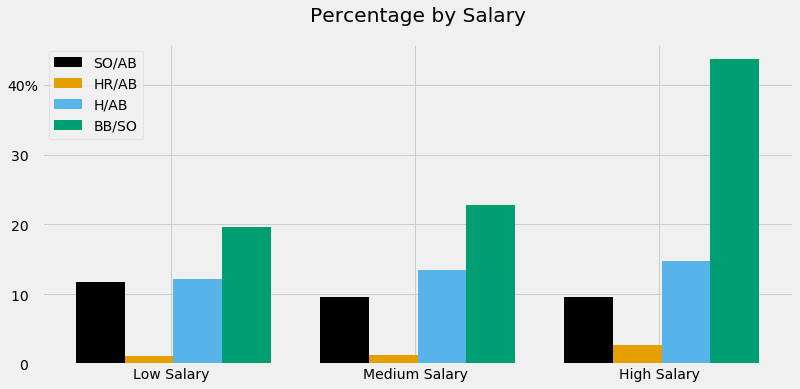

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Individual data points for each section
low_mean = lowest_salaried[["Salary","SO/AB (%)","HR/AB (%)", "H/AB (%)", "BB/SO (%)"]].mean()
med_mean = medium_salaried[["Salary","SO/AB (%)","HR/AB (%)", "H/AB (%)", "BB/SO (%)"]].mean()
high_mean = highest_salaried[["Salary","SO/AB (%)","HR/AB (%)", "H/AB (%)", "BB/SO (%)"]].mean()

# Individual bar data
strikeout = [low_mean[1],med_mean[1],high_mean[1]]
homeruns = [low_mean[2],med_mean[2],high_mean[2]]
hits = [low_mean[3],med_mean[3],high_mean[3]]
bases = [low_mean[4],med_mean[4],high_mean[4]]
length = np.arange(3)

# Width of bars
width = 0.2

# Plotting the graph!
fig, ax = plt.subplots(figsize=(12,5.5))

bar1 = ax.bar(length,strikeout,width,color=[0,0,0])
bar2 = ax.bar(length+width,homeruns,width,color=[230/255,159/255,0])
bar3 = ax.bar(length+(width*2),hits,width,color=[86/255,180/255,233/255])
bar4 = ax.bar(length+(width*3),bases,width,color=[0,158/255,115/255])

ax.set_yticklabels(labels = ['0  ', '10  ', '20  ', '30  ', '40%'])
ax.set_title('Percentage by Salary',y=1.05)
ax.set_xticks(length + 0.29)
ax.set_xticklabels(('Low Salary', 'Medium Salary', 'High Salary'))

ax.legend((bar1[0], bar2[0], bar3[0],bar4[0]), ('SO/AB', 'HR/AB','H/AB','BB/SO'),loc=2)

plt.show()

This is actually quite interesting as this identifies our alternative hypothesis may be correct when looking at a low, medium and high salaried athletes. To confirm this trend holds true we are going to have to look at more than just 3 data points. 

### Detailed Analysis

Let's instead split the data frame into groups of 10 and take the average of each interval, graphing the results to analyze visually.

In [17]:
# Sorting values
grouped_baseball_data = grouped_baseball_data.sort_values(by='Salary',ascending=True)

# number of intervals
num_data_points = int(grouped_baseball_data.shape[0]/10)

# Setting variables
split_baseball_data = []
beg = 0

# Create new dataframe averaging each interval we are looking at
for i in range(0,num_data_points):
    split_baseball_data.append(grouped_baseball_data.iloc[(i*10):((i+1)*10)][["Salary","SO/AB (%)","HR/AB (%)", "H/AB (%)", "BB/SO (%)"]].mean())
    
index_vals = range(0,num_data_points)
column_vals = ['Salary', 'SO/AB (%)', 'HR/AB (%)', 'H/AB (%)', 'BB/SO (%)']
mean_baseball_data = pd.DataFrame(split_baseball_data, index = index_vals, columns=column_vals)
mean_baseball_data.head(5)

,Salary,SO/AB (%),HR/AB (%),H/AB (%),BB/SO (%)
0,213700.000000,23.884595,2.523282,24.432918,40.502225
1,257200.000000,23.364733,2.480914,24.641177,37.990089
2,286250.000000,24.407607,2.549640,24.707989,40.173392
3,312175.000000,19.870122,2.436416,25.933779,39.551393
4,321241.666667,19.106548,2.258522,24.613799,55.382001


The above is a sample of our new dataframe which we wil use to visually represent the overall trend we are seeing.

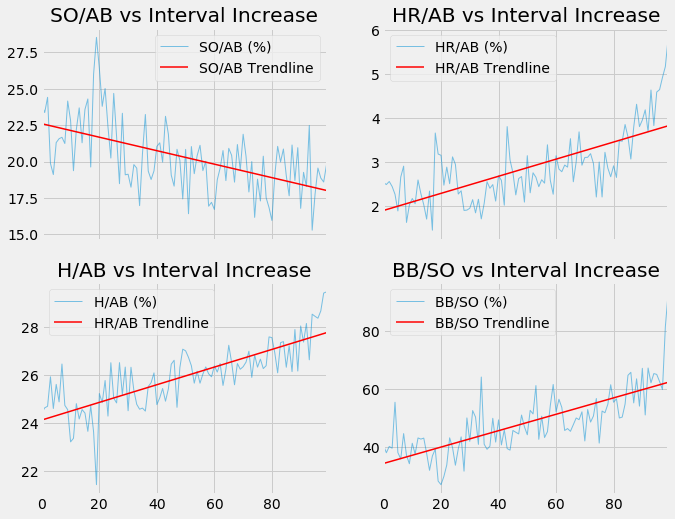

In [18]:
# Graphing the interval data
x_val = np.arange(0,num_data_points)

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,8))

# Graph 0,0
mean_baseball_data.plot(ax=axes[0,0],x=x_val,y='SO/AB (%)', kind='line',linewidth=1.0,alpha=0.5,title='SO/AB vs Interval Increase')
z = np.polyfit(x=x_val, y=mean_baseball_data['SO/AB (%)'], deg=1)
p = np.poly1d(z)

mean_baseball_data['SO/AB Trendline'] = p(x_val)

mean_baseball_data['SO/AB Trendline'].sort_index(ascending=False).plot(ax=axes[0,0],c='r', linewidth=1.5)
axes[0,0].legend(loc=1)
axes[0,0].xaxis.set_ticklabels([])

# Graph 0,1
mean_baseball_data.plot(ax=axes[0,1],x=x_val,y='HR/AB (%)', kind='line',linewidth=1.0,alpha=0.5,title='HR/AB vs Interval Increase')
z = np.polyfit(x=x_val, y=mean_baseball_data['HR/AB (%)'], deg=1)
p = np.poly1d(z)

mean_baseball_data['HR/AB Trendline'] = p(x_val)
mean_baseball_data['HR/AB Trendline'].sort_index(ascending=False).plot(ax=axes[0,1],c='r', linewidth=1.5)
axes[0,1].legend(loc=2)
axes[0,1].xaxis.set_ticklabels([])

# Graph 1, 0
mean_baseball_data.plot(ax=axes[1,0],x=x_val,y='H/AB (%)', kind='line',linewidth=1.0,alpha=0.5,title='H/AB vs Interval Increase')
z = np.polyfit(x=x_val, y=mean_baseball_data['H/AB (%)'], deg=1)
p = np.poly1d(z)

mean_baseball_data['HR/AB Trendline'] = p(x_val)
mean_baseball_data['HR/AB Trendline'].sort_index(ascending=False).plot(ax=axes[1,0],c='r', linewidth=1.5)
axes[1,0].legend(loc=2)

# Graph 1, 1
mean_baseball_data.plot(ax=axes[1,1],x=x_val,y='BB/SO (%)', kind='line',linewidth=1.0,alpha=0.5,title='BB/SO vs Interval Increase')
z = np.polyfit(x=x_val, y=mean_baseball_data['BB/SO (%)'], deg=1)
p = np.poly1d(z)

mean_baseball_data['BB/SO Trendline'] = p(x_val)
mean_baseball_data['BB/SO Trendline'].sort_index(ascending=False).plot(ax=axes[1,1],c='r', linewidth=1.5)
axes[1,1].legend(loc=2)

plt.show()

The four graphs seem to demonstrate our alternative hypothesis, the higher the salary interval the better the player.

### Confirmation of Hypothesis

To be sure our hypothesis is correct we need to confirm by calculating the correlation coefficient and p-value using the pearson-r method. If we find that there is a high correlation we can be sure that our original hypothesis is correct.

In [19]:
from scipy.stats import pearsonr

#determining the correlation and p-value for each statistic
x_val = np.arange(0,num_data_points)
corr_p_so = pearsonr(x=x_val,y=mean_baseball_data['SO/AB (%)'])
corr_p_hr = pearsonr(x=x_val,y=mean_baseball_data['HR/AB (%)'])
corr_p_h = pearsonr(x=x_val,y=mean_baseball_data['H/AB (%)'])
corr_p_bb = pearsonr(x=x_val,y=mean_baseball_data['BB/SO (%)'])

print('SO/AB: ',corr_p_so,'\n\n HR/AB: ',corr_p_hr,'\n\n H/AB: ',corr_p_h,'\n\n BB/SO: ',corr_p_bb)

SO/AB:  (-0.54911015119354978, 3.3074945748115496e-09) 

 HR/AB:  (0.69675308041932282, 8.2601500669481043e-16) 

 H/AB:  (0.79003285431236558, 1.5156578066996664e-22) 

 BB/SO:  (0.74925118446488315, 3.0883261053151635e-19)


The above print out shows that the r-value of each statistic we have been tracking is close to either 1 or -1. If we are to look at our null hypothesis, it states that the each of these values are not correlated to the salary interval. However, after looking at our pearson-r results we can see that each of the above have a high correlation and our p-values are incredibly small. This means we reject the null hypothesis and accept the alternative hypothesis which is that each of these statistics are correlated and dependent upon the salary value.

## Conclusion

Our analysis has concluded that as the salary interval increases, the better stats players will have. This analysis was based off of analyzing four different statistics which have followed the trend and undoubtedly proved that each of these values are correlated to one another using the pearson-r method. We are able to reject the null hypothesis and accept the alternative hypothesis which favours correlation between the values and the salary interval.